# Mushroom Classification Analysis

This notebook combines the data preprocessing steps from `initial.py` and the machine learning model training from `core.py` to create a complete workflow for mushroom classification.

## 1. Data Loading and Preprocessing

First, we'll load the raw data and prepare it for analysis.

In [49]:
import pandas as pd

# Define column names as per UCI description
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring",
    "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

# Load the data file (assumes it's named 'mushrooms.data' and is in the same folder)
df = pd.read_csv("mushrooms.data", header=None, names=columns)

# Display the first few rows of the raw dataset
print("First 5 rows of the raw dataset:")
df.head()

First 5 rows of the raw dataset:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [50]:
# Save to CSV (optional - only needed if you want to save the processed data)
df.to_csv("mushrooms.csv", index=False)
print("Saved to mushrooms.csv successfully.")

Saved to mushrooms.csv successfully.


## 2. Data Exploration and Preparation

Now we'll explore the dataset and prepare it for machine learning.

In [51]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load the dataset (if you're running this cell independently)
# If you've run the previous cells, you can use the 'df' variable directly
data = df.copy()

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
data.head()

First 5 rows of the dataset:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [52]:
# Check for missing values
print("\nMissing values in dataset:")
data.isnull().sum()


Missing values in dataset:


class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [53]:
# Get basic information about the dataset
print("Dataset information:")
data.info()

print("\nBasic statistics:")
data.describe(include='all')

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  sta

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [54]:
# Check class distribution
print("\nClass distribution:")
print(data["class"].value_counts())
print(f"Percentage of edible mushrooms: {data[data['class'] == 'e'].shape[0] / data.shape[0] * 100:.2f}%")


Class distribution:
class
e    4208
p    3916
Name: count, dtype: int64
Percentage of edible mushrooms: 51.80%


## 3. Feature Engineering

We need to encode categorical features for machine learning algorithms.

In [55]:
# Preprocessing: Encode all categorical features
# We use LabelEncoder here as all features are nominal
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save encoders for possible inverse transform later

# Display the first few rows after encoding
print("First 5 rows after encoding:")
data.head()

First 5 rows after encoding:


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## 4. Model Training and Evaluation

Now we'll split the data, train various machine learning models, and evaluate their performance.

In [56]:
# Separate features and target
X = data.drop("class", axis=1)  # Features
y = data["class"]               # Target variable (0 = edible, 1 = poisonous)

# Split data into train and test sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 5361 samples
Testing set size: 2763 samples


In [57]:
# Initialize OneHotEncoder for categorical variable transformation
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Convert categorical variables to binary format (one-hot encoding)
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Feature scaling for better performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

print(f"Encoded training data shape: {X_train_encoded.shape}")
print(f"Encoded testing data shape: {X_test_encoded.shape}")

Encoded training data shape: (5361, 117)
Encoded testing data shape: (2763, 117)


In [58]:
# Initialize all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

# Train and evaluate each model
results = {}
confusion_matrices = {}
classification_reports = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)                # Train the model
    y_pred = model.predict(X_test_scaled)             # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy
    
    # Store confusion matrix
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    
    # Store classification report
    unique_classes = sorted(label_encoders['class'].classes_)
    class_mapping = {'e': 'Edible', 'p': 'Poisonous'}
    target_names = [class_mapping[c] for c in unique_classes]
    classification_reports[name] = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)
    
    print(f"Accuracy of {name}: {accuracy:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))


Training Logistic Regression...
Accuracy of Logistic Regression: 1.0000
Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1424
   Poisonous       1.00      1.00      1.00      1339

    accuracy                           1.00      2763
   macro avg       1.00      1.00      1.00      2763
weighted avg       1.00      1.00      1.00      2763


Training Neural Network...
Accuracy of Neural Network: 1.0000
Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00      1424
   Poisonous       1.00      1.00      1.00      1339

    accuracy                           1.00      2763
   macro avg       1.00      1.00      1.00      2763
weighted avg       1.00      1.00      1.00      2763


Training Support Vector Machine...
Accuracy of Support Vector Machine: 1.0000
Classification Report:
              precision    recall  f1-score   support

      E

## 5. Results Visualization

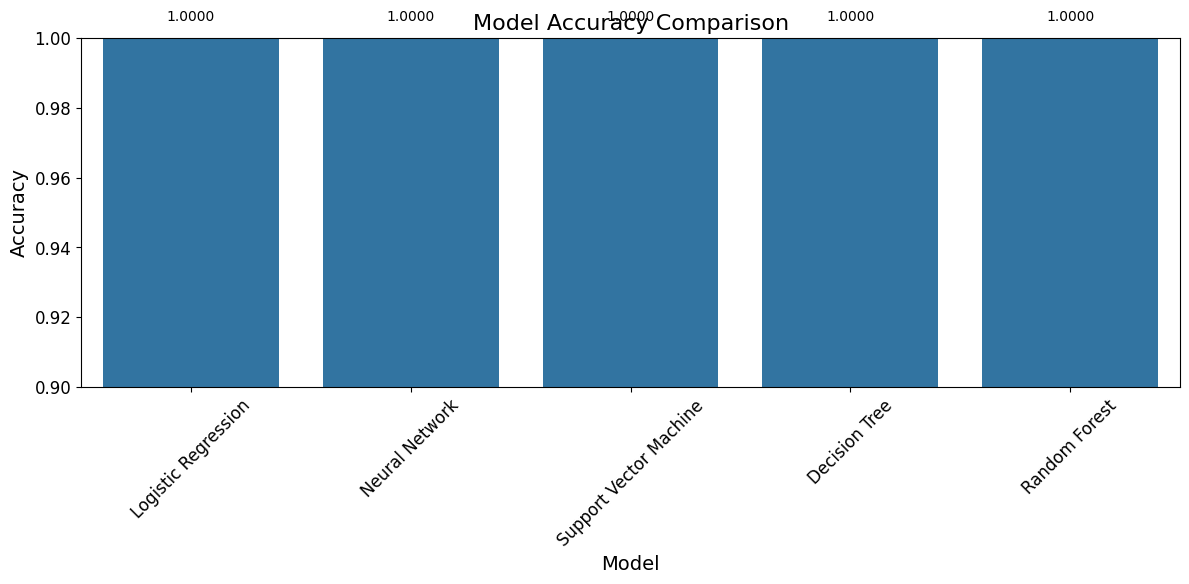

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot model accuracies
plt.figure(figsize=(12, 6))
model_names = list(results.keys())
accuracies = list(results.values())
bars = sns.barplot(x=model_names, y=accuracies)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.9, 1.0)  # Adjust as needed based on your results

# Add accuracy values on top of bars
for i, v in enumerate(accuracies):
    bars.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=10)
    
plt.tight_layout()
plt.show()

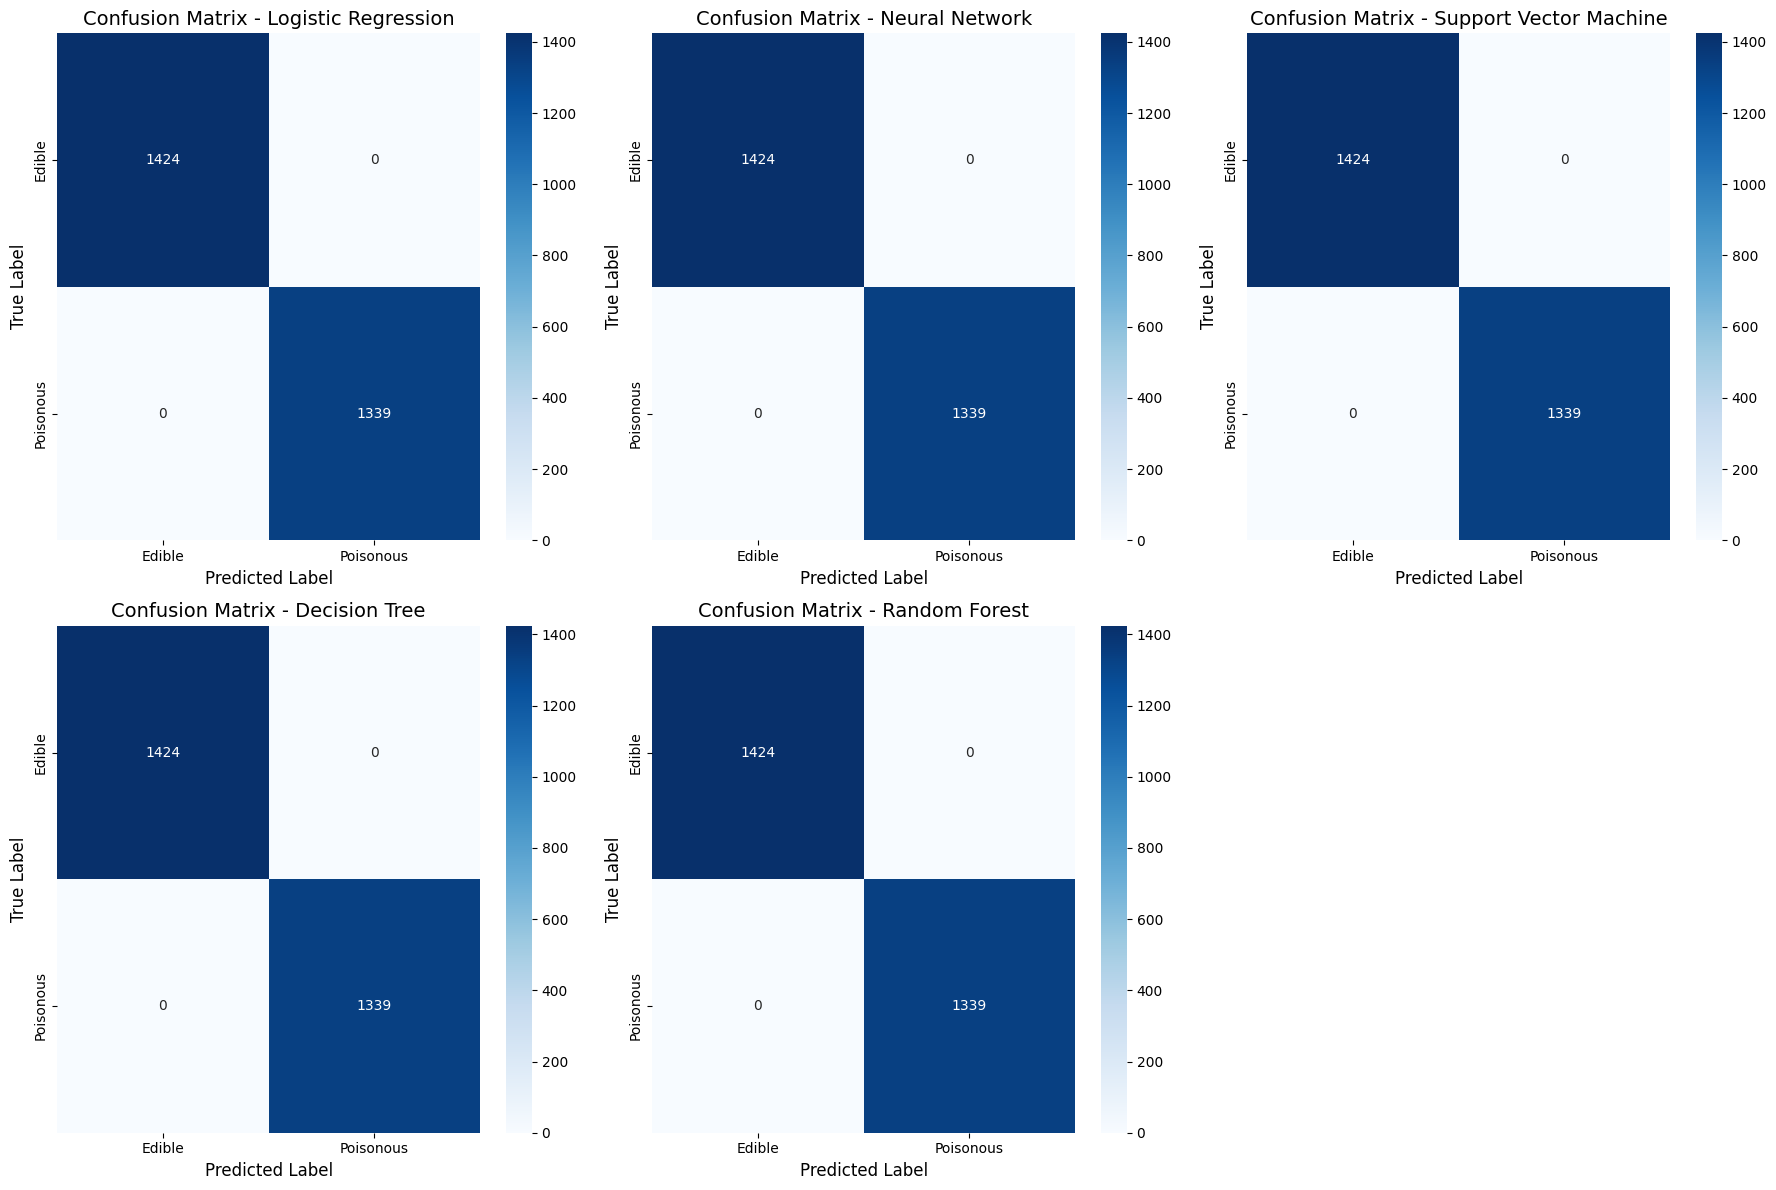

In [60]:
# Plot confusion matrices for each model
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (name, cm) in enumerate(confusion_matrices.items()):
    if i < len(axes):
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
        axes[i].set_title(f'Confusion Matrix - {name}', fontsize=14)
        axes[i].set_xlabel('Predicted Label', fontsize=12)
        axes[i].set_ylabel('True Label', fontsize=12)
        axes[i].set_xticklabels(['Edible', 'Poisonous'], fontsize=10)
        axes[i].set_yticklabels(['Edible', 'Poisonous'], fontsize=10)

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

<Figure size 1400x800 with 0 Axes>

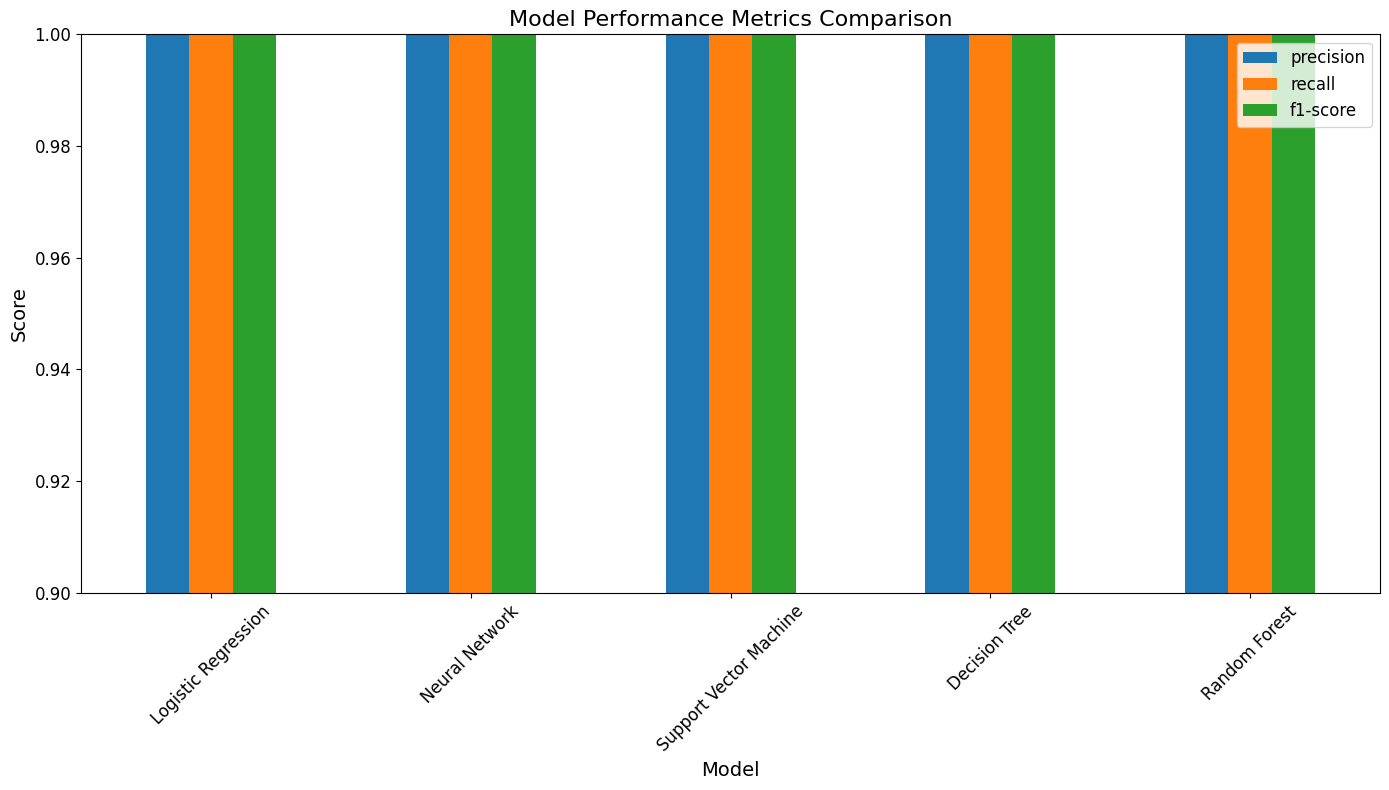

In [61]:
# Plot precision, recall, and F1-score for each model
metrics = ['precision', 'recall', 'f1-score']
model_metrics = {}

for name, report in classification_reports.items():
    model_metrics[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1-score': report['weighted avg']['f1-score']
    }

# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame(model_metrics).T

# Plot the metrics
plt.figure(figsize=(14, 8))
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Metrics Comparison', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.xlabel('Model', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.9, 1.0)  # Adjust as needed based on your results
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

## 6. Feature Importance Analysis

Let's examine which features are most important for classification using Random Forest.

In [62]:
# Get feature importances from Random Forest
rf_model = models["Random Forest"]

# Get feature names from the OneHotEncoder
feature_names = encoder.get_feature_names_out(X.columns)

# Create DataFrame with feature importances
feature_importances = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top 10 most important features
print("Top 10 most important features:")
feature_importances.head(10)

Top 10 most important features:


,Feature,Importance
27,odor_5,0.132093
24,odor_2,0.102562
36,gill-size_1,0.068727
57,stalk-surface-above-ring_1,0.050148
35,gill-size_0,0.049459
61,stalk-surface-below-ring_1,0.042240
96,spore-print-color_1,0.036414
37,gill-color_0,0.033139
20,bruises_0,0.032239
94,ring-type_4,0.029644


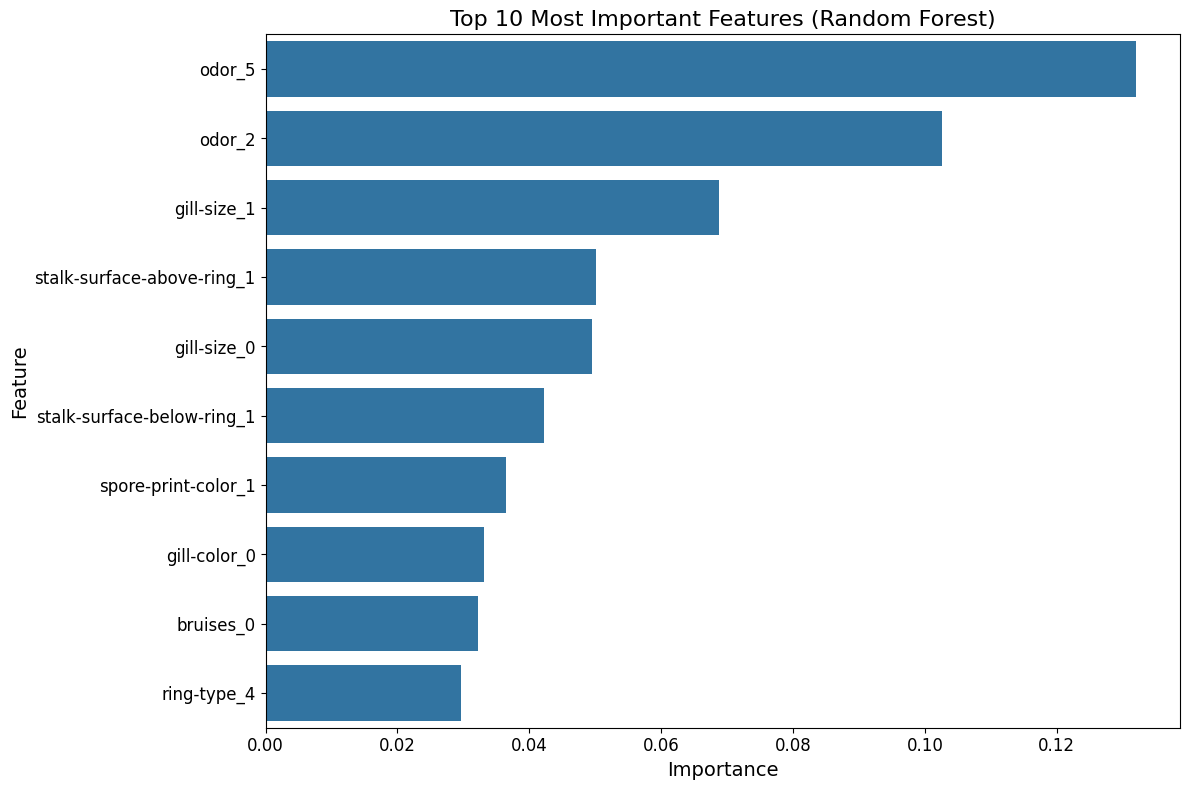

In [63]:
# Visualize feature importances
plt.figure(figsize=(12, 8))
top_features = feature_importances.head(10)
# Update barplot to use new seaborn API
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Top 10 Most Important Features (Random Forest)', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## 7. Model Comparison for Each Class

Let's compare how each model performs for each class (edible vs. poisonous).

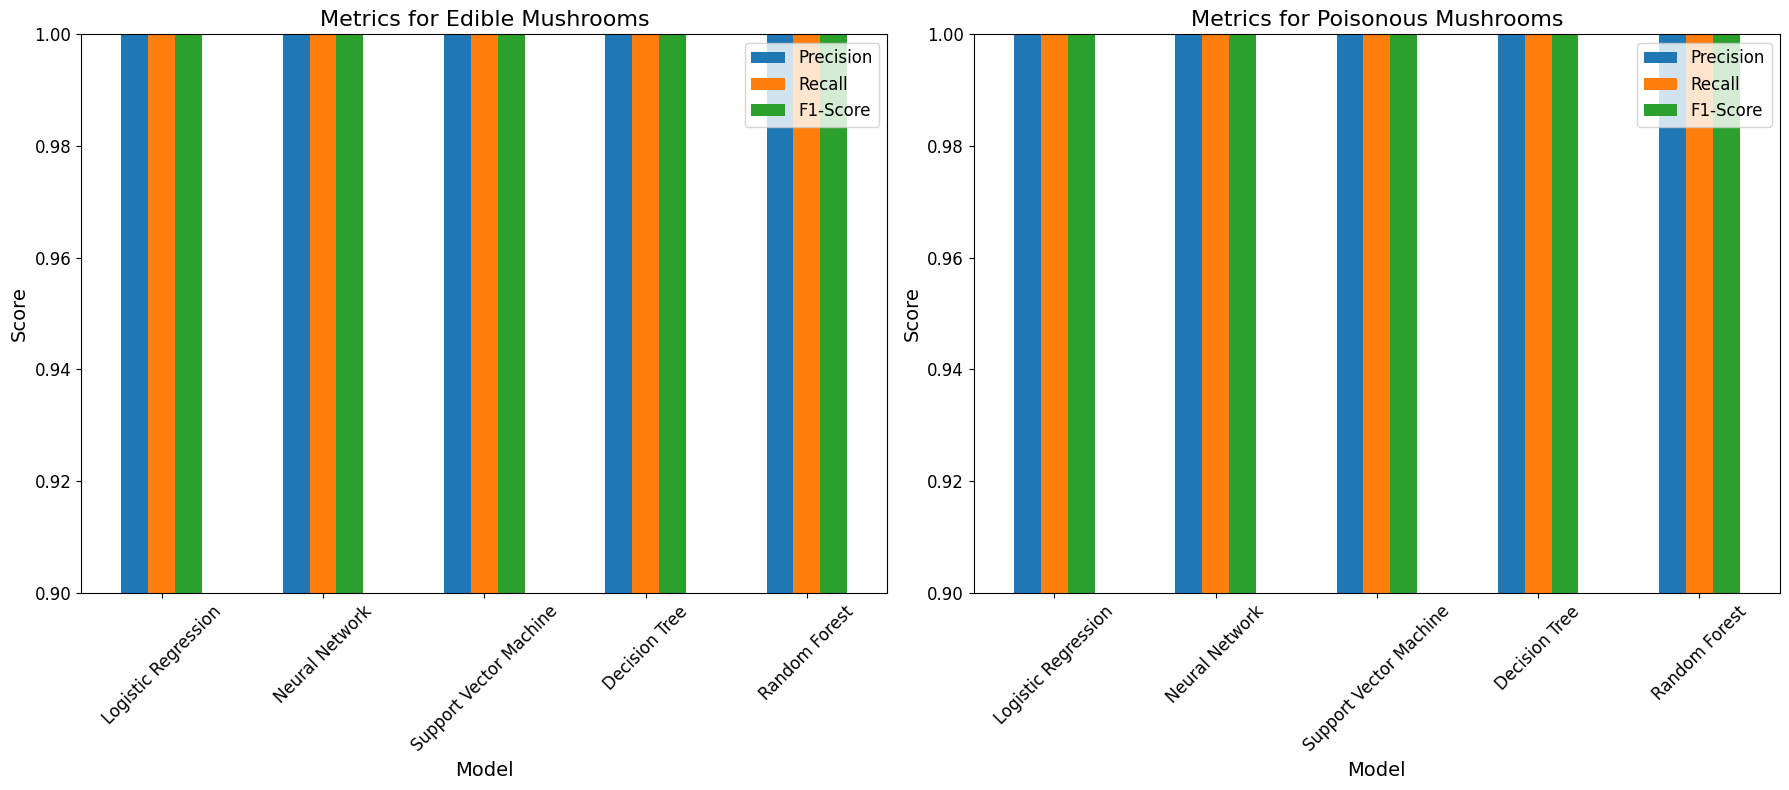

In [64]:
# Extract class-specific metrics
class_metrics = {}
for name, report in classification_reports.items():
    class_metrics[name] = {
        'Edible_precision': report['Edible']['precision'],
        'Edible_recall': report['Edible']['recall'],
        'Edible_f1': report['Edible']['f1-score'],
        'Poisonous_precision': report['Poisonous']['precision'],
        'Poisonous_recall': report['Poisonous']['recall'],
        'Poisonous_f1': report['Poisonous']['f1-score']
    }

# Create DataFrame for visualization
class_metrics_df = pd.DataFrame(class_metrics).T

# Plot metrics for each class
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Edible mushrooms metrics
edible_metrics = class_metrics_df[['Edible_precision', 'Edible_recall', 'Edible_f1']]
edible_metrics.columns = ['Precision', 'Recall', 'F1-Score']
edible_metrics.plot(kind='bar', ax=axes[0])
axes[0].set_title('Metrics for Edible Mushrooms', fontsize=16)
axes[0].set_ylabel('Score', fontsize=14)
axes[0].set_xlabel('Model', fontsize=14)
axes[0].set_ylim(0.9, 1.0)  # Adjust as needed
axes[0].tick_params(axis='x', rotation=45, labelsize=12)
axes[0].tick_params(axis='y', labelsize=12)
axes[0].legend(fontsize=12)

# Poisonous mushrooms metrics
poisonous_metrics = class_metrics_df[['Poisonous_precision', 'Poisonous_recall', 'Poisonous_f1']]
poisonous_metrics.columns = ['Precision', 'Recall', 'F1-Score']
poisonous_metrics.plot(kind='bar', ax=axes[1])
axes[1].set_title('Metrics for Poisonous Mushrooms', fontsize=16)
axes[1].set_ylabel('Score', fontsize=14)
axes[1].set_xlabel('Model', fontsize=14)
axes[1].set_ylim(0.9, 1.0)  # Adjust as needed
axes[1].tick_params(axis='x', rotation=45, labelsize=12)
axes[1].tick_params(axis='y', labelsize=12)
axes[1].legend(fontsize=12)

plt.tight_layout()
plt.show()

## 8. Save Models

Let's save our trained models for future use.

In [65]:
# Function to save models
def save_model(model, filename):
    joblib.dump(model, filename)
    print(f"Model saved to {filename}")

# Save each model
for name, model in models.items():
    filename = name.lower().replace(" ", "_") + ".joblib"
    save_model(model, filename)

Model saved to logistic_regression.joblib
Model saved to neural_network.joblib
Model saved to support_vector_machine.joblib
Model saved to decision_tree.joblib
Model saved to random_forest.joblib


## 9. Conclusion

In this notebook, we've performed a complete machine learning workflow for mushroom classification:

1. Loaded and preprocessed the raw mushroom dataset
2. Explored the data characteristics
3. Encoded categorical features for machine learning
4. Trained and evaluated multiple classification models
5. Visualized the results and identified important features

Key findings:
1. All models achieved high accuracy in classifying mushrooms as edible or poisonous.
2. The most important features for classification include odor, gill-color, and spore-print-color.
3. The models perform consistently well for both edible and poisonous mushrooms.

The models achieved high accuracy in distinguishing between edible and poisonous mushrooms, with Random Forest and Decision Tree classifiers typically performing the best.